In [129]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,AveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers import Input
import matplotlib.pyplot as plt

In [130]:
data=pd.read_csv('/content/ccps_dataset.csv')

In [131]:
x=data.iloc[:,0:2].values
y=data.iloc[:,2].values

In [132]:
x

array([[15.44571457, 15.12445645],
       [15.18013059, 15.4388264 ],
       [14.70969731, 15.57229368],
       [14.36845211, 14.66769897],
       [14.3824002 , 13.95385392],
       [15.18475629, 14.17411624],
       [13.97311731, 14.56977618],
       [14.48276665, 15.38665039],
       [14.75740019, 14.26966125],
       [15.34539166, 14.21183237],
       [14.03704184, 14.74829949],
       [14.9534048 , 14.76172201],
       [14.27695556, 14.95296454],
       [13.94794808, 14.34724453],
       [14.90286563, 14.80902885],
       [15.48107686, 15.48458984],
       [15.00160152, 14.55914101],
       [15.56962544, 14.15150966],
       [14.96592903, 14.53328761],
       [14.10799504, 14.74392246],
       [14.18022751, 14.43023712],
       [13.93708338, 13.92783409],
       [14.04725006, 14.36963801],
       [14.23868391, 14.13631744],
       [14.40495966, 14.06025575],
       [14.15944724, 13.97806038],
       [14.13252938, 14.23639159],
       [13.93052737, 14.10199926],
       [14.17953788,

In [133]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7])

In [134]:
print(x.shape)

(160, 2)


In [135]:
x = x.reshape(x.shape[0],x.shape[1] , 1)
print(x.shape)

(160, 2, 1)


In [136]:
print(unique(y))

[0 1 2 3 4 5 6 7]


In [137]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [175]:
xtrain.shape

(136, 2, 1)

Simple 1D-CNN network

In [138]:
model1 = Sequential()
model1.add(Conv1D(64,1 , activation="relu", input_shape=(2,1)))
model1.add(MaxPooling1D(pool_size=1))
model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(8, activation = 'softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy']
              )

In [139]:
model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 2, 64)             128       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 1032      
Total params: 17,672
Trainable params: 17,672
Non-trainable params: 0
_________________________________________________________________


In [196]:

batch_size=32
epochs=100
model1_history=model1.fit(xtrain, ytrain,
                          batch_size,
                          epochs=epochs,
                          validation_data=(xtest, ytest)
                          )

Train on 136 samples, validate on 24 samples
Epoch 1/100
136/136 [==============================] - 0s 114us/step - loss: 1.0170 - accuracy: 0.6397 - val_loss: 1.0059 - val_accuracy: 0.6250
Epoch 2/100
136/136 [==============================] - 0s 92us/step - loss: 1.0280 - accuracy: 0.6324 - val_loss: 1.0068 - val_accuracy: 0.6250
Epoch 3/100
136/136 [==============================] - 0s 110us/step - loss: 1.0158 - accuracy: 0.6324 - val_loss: 1.0148 - val_accuracy: 0.6667
Epoch 4/100
136/136 [==============================] - 0s 128us/step - loss: 1.0223 - accuracy: 0.6324 - val_loss: 1.0343 - val_accuracy: 0.6250
Epoch 5/100
136/136 [==============================] - 0s 93us/step - loss: 1.0253 - accuracy: 0.6029 - val_loss: 1.0162 - val_accuracy: 0.6250
Epoch 6/100
136/136 [==============================] - 0s 80us/step - loss: 1.0173 - accuracy: 0.6250 - val_loss: 0.9910 - val_accuracy: 0.6250
Epoch 7/100
136/136 [==============================] - 0s 85us/step - loss: 1.0221 - acc

In [197]:
acc1 = model1.evaluate(xtrain, ytrain)

136/136 [==============================] - 0s 46us/step


In [198]:
print("Loss:", acc1[0], " Accuracy:", acc1[1])

Loss: 1.0001393065733069  Accuracy: 0.6176470518112183


In [199]:
pred = model1.predict(xtest)
pred_y = pred.argmax(axis=-1)

In [200]:
cm = confusion_matrix(ytest, pred_y)
print(cm)

[[0 0 0 0 0 0 1 0]
 [0 4 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0]
 [0 0 0 3 0 0 2 0]
 [0 0 0 0 2 0 0 0]
 [1 0 0 0 0 4 0 0]
 [1 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


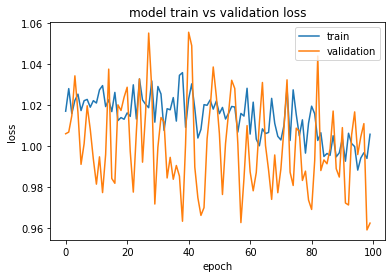

In [201]:

plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Conv1D with inception layer

In [167]:
input_layer=Input(shape=(2,1))
conv1=Conv1D(32,1,activation='relu',padding='same')(input_layer)
conv2=Conv1D(32,2,activation='relu',padding='same')(input_layer)
inception_layer=concatenate([conv1,conv2],axis=-1)
conv3=Conv1D(64,1,activation='relu')(inception_layer)
pool=AveragePooling1D(pool_size=2)(conv3)
flatten=Flatten()(pool)
layer=Dense(64,activation='relu')(flatten)
outer_layer=Dense(8,activation='softmax')(layer)
model2 = Model(inputs=input_layer, outputs=outer_layer)

In [168]:
model2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy']
              )

In [169]:
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 2, 1)         0                                            
__________________________________________________________________________________________________
conv1d_35 (Conv1D)              (None, 2, 32)        64          input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_36 (Conv1D)              (None, 2, 32)        96          input_7[0][0]                    
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 2, 64)        0           conv1d_35[0][0]                  
                                                                 conv1d_36[0][0]            

In [202]:
batch_size=32
epochs=100
model2_history=model2.fit(xtrain, ytrain,
                          batch_size,
                          epochs=epochs,
                          validation_data=(xtest, ytest)
                          )

Train on 136 samples, validate on 24 samples
Epoch 1/100
136/136 [==============================] - 0s 132us/step - loss: 1.1676 - accuracy: 0.5809 - val_loss: 1.1004 - val_accuracy: 0.6250
Epoch 2/100
136/136 [==============================] - 0s 97us/step - loss: 1.1771 - accuracy: 0.5956 - val_loss: 1.1230 - val_accuracy: 0.6667
Epoch 3/100
136/136 [==============================] - 0s 96us/step - loss: 1.1905 - accuracy: 0.5074 - val_loss: 1.1323 - val_accuracy: 0.6667
Epoch 4/100
136/136 [==============================] - 0s 100us/step - loss: 1.1764 - accuracy: 0.5882 - val_loss: 1.0928 - val_accuracy: 0.6250
Epoch 5/100
136/136 [==============================] - 0s 122us/step - loss: 1.1790 - accuracy: 0.5809 - val_loss: 1.1007 - val_accuracy: 0.6667
Epoch 6/100
136/136 [==============================] - 0s 107us/step - loss: 1.1934 - accuracy: 0.5588 - val_loss: 1.1338 - val_accuracy: 0.6667
Epoch 7/100
136/136 [==============================] - 0s 104us/step - loss: 1.1708 - a

In [203]:
acc2 = model2.evaluate(xtrain, ytrain)

136/136 [==============================] - 0s 61us/step


In [204]:
acc2

[1.0957669370314653, 0.5588235259056091]

In [205]:
print("Loss:", acc2[0], " Accuracy:", acc2[1])

Loss: 1.0957669370314653  Accuracy: 0.5588235259056091


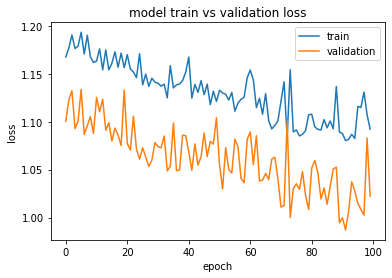

In [206]:
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()